# Homework 3 

## Exploratory Data Analysis

### IRIS Data
We start by reading the data `IRIS.csv` and use the function `head` to see the structure of the data. 

In [6]:
iris_df <- read.csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv', fileEncoding = 'UTF-8')
head(iris_df)

,sepal_length,sepal_width,petal_length,petal_width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


From `head`, we can see that the data includes four numeric variables (`sepal_length`, `sepal_width`, `petal_length` and `petal_width`) and one string nominal variable `species`.

In this task we want to explore the following questions:

1. Is there a relationship between sepal dimensions and petal dimensions?
2. How are the sepal and petal dimensions distributed?
3. How are the different variables related to each other?

We start by exploring question 1. To draw some conclusions, we want to create a scatterplot as provided in the instructions, and this can be done with faceting. But first, we need to reshape the data.

In [51]:
library(tidyverse, quietly = TRUE, warn.conflicts = FALS)

iris_length <- iris_df %>%
    select(sepal_length, petal_length, species) %>%
    mutate(plot_group = 'Sepal vs Petal Length') %>%
    rename(x = sepal_length, y = petal_length)

iris_width <- iris_df %>%
    select(sepal_width, petal_width, species) %>%
    mutate(plot_group = 'Sepal vs Petal Width') %>%
    rename(x = sepal_width, y = petal_width)

iris_combined <- bind_rows(iris_length, iris_width)
head(iris_length)
head(iris_length)
head(iris_combined)

,x,y,species,plot_group
,<dbl>,<dbl>,<chr>,<chr>
1,5.1,1.4,Iris-setosa,Sepal vs Petal Length
2,4.9,1.4,Iris-setosa,Sepal vs Petal Length
3,4.7,1.3,Iris-setosa,Sepal vs Petal Length
4,4.6,1.5,Iris-setosa,Sepal vs Petal Length
5,5.0,1.4,Iris-setosa,Sepal vs Petal Length
6,5.4,1.7,Iris-setosa,Sepal vs Petal Length


,x,y,species,plot_group
,<dbl>,<dbl>,<chr>,<chr>
1,5.1,1.4,Iris-setosa,Sepal vs Petal Length
2,4.9,1.4,Iris-setosa,Sepal vs Petal Length
3,4.7,1.3,Iris-setosa,Sepal vs Petal Length
4,4.6,1.5,Iris-setosa,Sepal vs Petal Length
5,5.0,1.4,Iris-setosa,Sepal vs Petal Length
6,5.4,1.7,Iris-setosa,Sepal vs Petal Length


,x,y,species,plot_group
,<dbl>,<dbl>,<chr>,<chr>
1,5.1,1.4,Iris-setosa,Sepal vs Petal Length
2,4.9,1.4,Iris-setosa,Sepal vs Petal Length
3,4.7,1.3,Iris-setosa,Sepal vs Petal Length
4,4.6,1.5,Iris-setosa,Sepal vs Petal Length
5,5.0,1.4,Iris-setosa,Sepal vs Petal Length
6,5.4,1.7,Iris-setosa,Sepal vs Petal Length


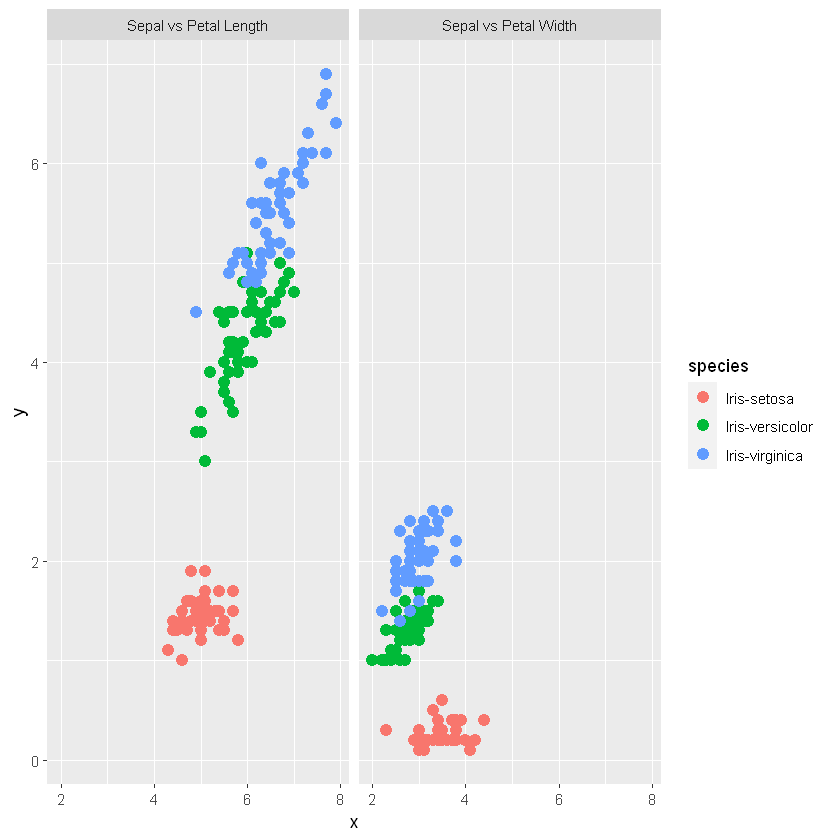

In [52]:
ggplot(iris_combined, aes(x = x, y = y, color = species)) +
    geom_point(size = 3) +
    facet_wrap(~plot_group) +
    